# ** How do different deep learning architectures compare in the task of ship detection from satellite imagery**

# ** EDA **

In [51]:
import numpy as np
from numpy import expand_dims
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
import keras
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [52]:
# Loading and trasnforming data

file_path = '../input/ships-in-satellite-imagery/shipsnet.json'

with open(file_path, 'r') as data_file:
    dataset = json.load(data_file)

df = pd.DataFrame(dataset)


                                                data  labels  \
0  [82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...       1   
1  [76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...       1   
2  [125, 127, 129, 130, 126, 125, 129, 133, 132, ...       1   
3  [102, 99, 113, 106, 96, 102, 105, 105, 103, 10...       1   
4  [78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...       1   

                                   locations             scene_ids  
0    [-118.2254694333423, 33.73803725920789]  20180708_180909_0f47  
1    [-122.33222866289329, 37.7491755586813]  20170705_180816_103e  
2  [-118.14283073363218, 33.736016066914175]  20180712_211331_0f06  
3   [-122.34784341495181, 37.76648707436548]  20170609_180756_103a  
4   [-122.34852408322172, 37.75878462398653]  20170515_180653_1007  


In [53]:
# explore dataset

print(df.head())

df.info()

                                                data  labels  \
0  [82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...       1   
1  [76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...       1   
2  [125, 127, 129, 130, 126, 125, 129, 133, 132, ...       1   
3  [102, 99, 113, 106, 96, 102, 105, 105, 103, 10...       1   
4  [78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...       1   

                                   locations             scene_ids  
0    [-118.2254694333423, 33.73803725920789]  20180708_180909_0f47  
1    [-122.33222866289329, 37.7491755586813]  20170705_180816_103e  
2  [-118.14283073363218, 33.736016066914175]  20180712_211331_0f06  
3   [-122.34784341495181, 37.76648707436548]  20170609_180756_103a  
4   [-122.34852408322172, 37.75878462398653]  20170515_180653_1007  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       4

In [76]:
# Expolring the count of each lable in the dataframe (1 or 0, representing the "ship images" class and "no-ship images" class)

print(df['labels'].value_counts())

0    3000
1    1000
Name: labels, dtype: int64


In [78]:
# Analyzing the resolution and structure the of the satellite images,.

len(df["data"].iloc[0])

19200

In [82]:
#Understanding of the distribution of images in the dataset

label_counts = df["labels"].value_counts()

ship_images = label_counts.get(1, 0)

no_ship_images = label_counts.get(0, 0)

print("Number of the ship_images: {}".format(ship_images),"\n")
print("Number of the no_ship_images: {}".format(no_ship_images))

Number of the ship_images: 1000 

Number of the no_ship_images: 3000


In [72]:
ship_images = shipsnet["labels"].value_counts()[0]
no_ship_images = shipsnet["labels"].value_counts()[1]
print("Number of the ship_images :{}".format(ship_images),"\n")
print("Number of the no ship_images :{}".format(no_ship_images))

Number of the ship_images :3000 

Number of the no ship_images :1000


# ** Data Preparation **

In [86]:
# Transform Dataset images  and labels to Numpy Arrays for Model Input machine learning models

x = np.array(dataset['data']).astype('uint8')
y = np.array(dataset['labels']).astype('uint8')


In [102]:
x.shape

(4000, 19200)

In [87]:
#Reshaping Flattened Image Data (1D array of image data (19200 values per image)) into its 
  #original 3D structure (80x80 pixels with 3 RGB channels) for visulization       

x_reshaped = x.reshape([-1, 3, 80, 80])

In [88]:
x_reshaped.shape

(4000, 3, 80, 80)

In [89]:
x_reshaped = x.reshape([-1, 3, 80, 80]).transpose([0,2,3,1])
x_reshaped.shape

(4000, 80, 80, 3)

In [90]:

y.shape

(4000,)

In [92]:
# Convert y label values from 1 or 0 to binary

y_reshaped = to_categorical(y, num_classes=2)

y_reshaped.shape

(4000, 2)

In [93]:
y_reshaped

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# **Data Visualization**

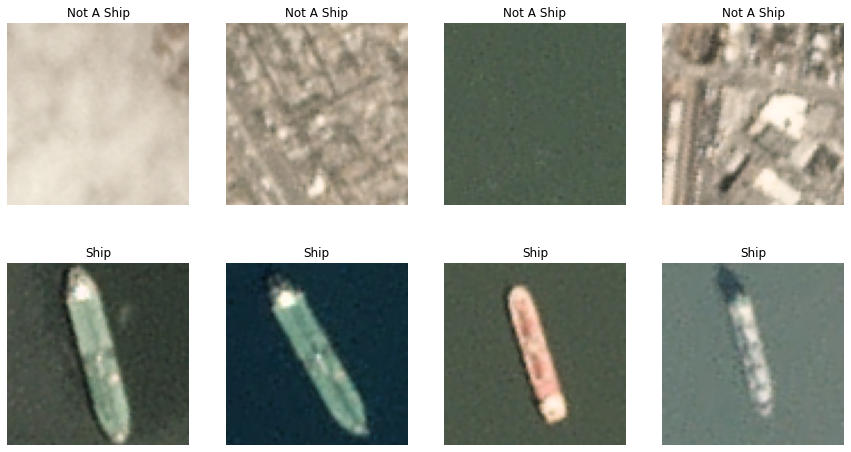

In [94]:
image_no_ship = x_reshaped[y==0]
image_ship = x_reshaped[y==1]

def plot(a,b):
    
    plt.figure(figsize=(15, 15))
    for i, k in enumerate(range(1,9)):
        if i < 4:
            plt.subplot(2,4,k)
            plt.title('Not A Ship')
            plt.imshow(image_no_ship[i+2])
            plt.axis("off")
        else:
            plt.subplot(2,4,k)
            plt.title('Ship')
            plt.imshow(image_ship[i+15])
            plt.axis("off")
            
    plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.25)

#Implementation of the function 

plot(image_no_ship, image_ship)

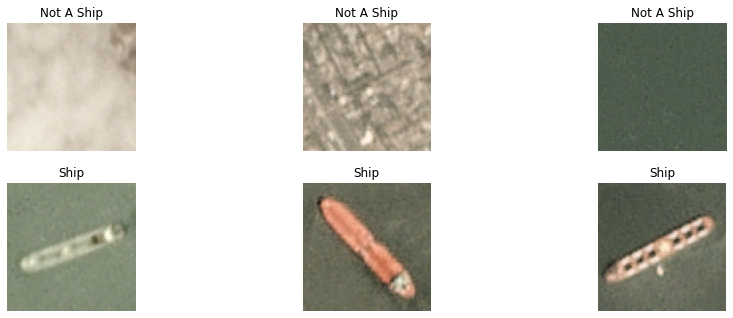

In [96]:
# Visualizing Sample Satellite Images with and without Ships

image_no_ship = x_reshaped[y==0]
image_ship = x_reshaped[y==1]

# Define a function to plot samples (6) of images from both categories side-by-side
def plot(a, b):
    plt.figure(figsize=(15, 10))

    for i, k in enumerate(range(1, 7)):
        if i < 3:
            plt.subplot(2, 3, k)  
            plt.title('Not A Ship')  
            plt.imshow(image_no_ship[i+2]) 
            plt.axis("off") 
        else:
            plt.subplot(2, 3, k)  
            plt.title('Ship')  
            plt.imshow(image_ship[i-1]) 
            plt.axis("off") 

    plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.25)

plot(image_no_ship, image_ship)


In [99]:

# Visualizing Satellite Images with RGB Pixel Intensity Histograms

def plotHistogram(ship, not_ship):

    plt.figure(figsize = (10,7))
    plt.subplot(2,2,1)
    plt.imshow(ship)
    plt.axis('off')
    plt.title('Ship')
    histo = plt.subplot(2,2,2)
    histo.set_ylabel('Count', fontweight = "bold")
    histo.set_xlabel('Pixel Intensity', fontweight = "bold")
    n_bins = 30
    plt.hist(ship[:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
    plt.hist(ship[:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
    plt.hist(ship[:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
    plt.show()
    print("Minimum pixel value of this image: {}".format(ship.min()))
    print("Maximum pixel value of this image: {}".format(ship.max()))
    plt.figure(figsize = (10,7))
    plt.subplot(2,2,3)
    plt.imshow(not_ship)
    plt.axis('off')
    plt.title('Not A Ship')
    histo = plt.subplot(2,2,4)
    histo.set_ylabel('Count', fontweight = "bold")
    histo.set_xlabel('Pixel Intensity', fontweight = "bold")
    n_bins = 30
    plt.hist(not_ship[:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
    plt.hist(not_ship[:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
    plt.hist(not_ship[:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
    plt.show()
    print("Minimum pixel value of this image: {}".format(not_ship.min()))
    print("Maximum pixel value of this image: {}".format(not_ship.max()))


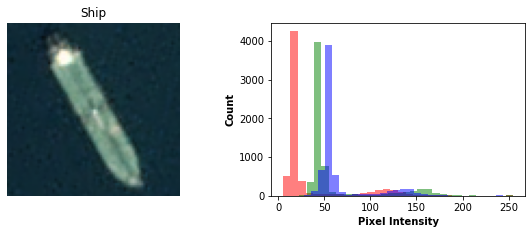

Minimum pixel value of this image: 5
Maximum pixel value of this image: 255


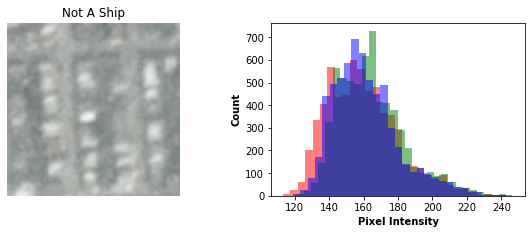

Minimum pixel value of this image: 113
Maximum pixel value of this image: 247


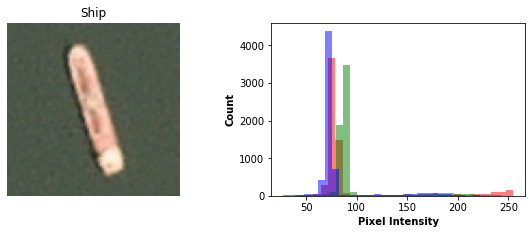

Minimum pixel value of this image: 27
Maximum pixel value of this image: 255


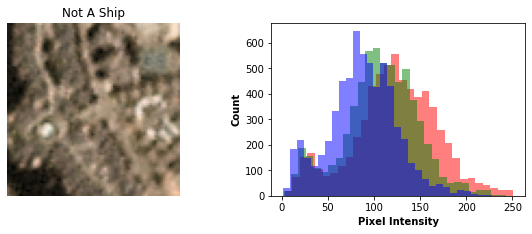

Minimum pixel value of this image: 1
Maximum pixel value of this image: 251


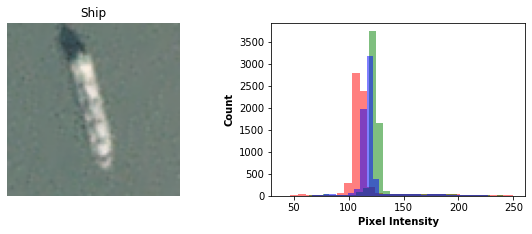

Minimum pixel value of this image: 40
Maximum pixel value of this image: 250


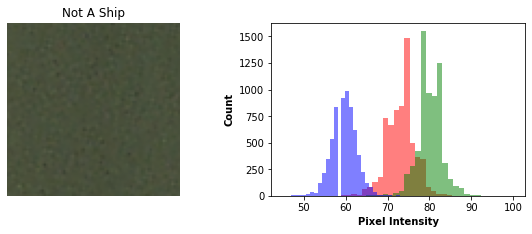

Minimum pixel value of this image: 45
Maximum pixel value of this image: 100


In [100]:
#applying the function
for i in range (20,23):
    plotHistogram(x_reshaped[y==1][i], x_reshaped[y==0][i])

# **Channel View **

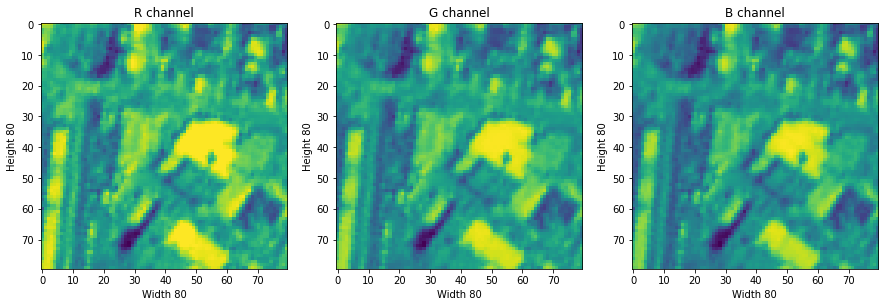

In [103]:
my_list = [(0, 'R channel'), (1, 'G channel'), (2, 'B channel')]

plt.figure(figsize = (15,15))

for i, k in my_list:
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.ylabel('Height {}'.format(x_reshaped[y==0][5].shape[0]))
    plt.xlabel('Width {}'.format(x_reshaped[y==0][5].shape[1]))
    plt.imshow(x_reshaped[y==0][5][ : , : , i])

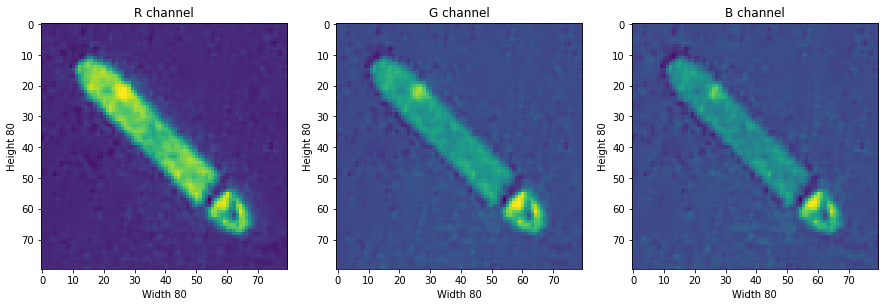

In [104]:
my_list = [(0, 'R channel'), (1, 'G channel'), (2, 'B channel')]

plt.figure(figsize = (15,15))

for i, k in my_list:
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.ylabel('Height {}'.format(x_reshaped[y==0][5].shape[0]))
    plt.xlabel('Width {}'.format(x_reshaped[y==0][5].shape[1]))
    plt.imshow(x_reshaped[y==1][5][ : , : , i])

# **Modeling**

In [ ]:
# Normalize data

x_reshaped = x_reshaped / 255
x_reshaped[0][0][0]

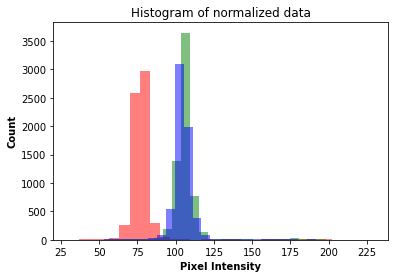

In [105]:
# Visualizing Pixel Intensity Distribution of a normalized data

n_bins = 30
plt.hist(x_reshaped[y == 0][0][:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
plt.hist(x_reshaped[y == 0][0][:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
plt.hist(x_reshaped[y == 0][0][:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
plt.ylabel('Count', fontweight = "bold")
plt.xlabel('Pixel Intensity', fontweight = "bold")
plt.title("Histogram of normalized data")
plt.show()

In [120]:
x_train_1, x_test, y_train_1, y_test = train_test_split(x_reshaped, y_reshaped,
                                                        test_size = 0.20, random_state = 42)


x_train, x_val, y_train, y_val = train_test_split(x_train_1, y_train_1, 
                                                  test_size = 0.25, random_state = 42)


print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)
print("x_val shape",x_val.shape)
print("y_val shape",y_val.shape)


x_train shape (2400, 80, 80, 3)
x_test shape (800, 80, 80, 3)
y_train shape (2400, 2)
y_test shape (800, 2)
x_val shape (800, 80, 80, 3)
y_val shape (800, 2)


# **Artificial Neural Network (ANN)**



In [121]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras import callbacks

# Model definition
model = Sequential()
model.add(Flatten(input_shape=[80, 80, 3]))
model.add(Dense(200, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Changed to softmax for multiclass classification

# Compiling the model
model.compile(loss='categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

# Setting up EarlyStopping callback
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", 
                                        patience = 10, 
                                        restore_best_weights = True)

# Training the model
history = model.fit(x_train, y_train, 
                    epochs=100, 
                    validation_data=(x_val, y_val), 
                    callbacks=[earlystopping])


Epoch 1/100
75/75 [==============================] - 2s 18ms/step - loss: 229.4880 - accuracy: 0.7200 - val_loss: 178.6217 - val_accuracy: 0.2688
Epoch 2/100
75/75 [==============================] - 1s 16ms/step - loss: 38.6151 - accuracy: 0.7887 - val_loss: 12.2849 - val_accuracy: 0.8637
Epoch 3/100
75/75 [==============================] - 1s 16ms/step - loss: 24.7256 - accuracy: 0.8042 - val_loss: 29.6306 - val_accuracy: 0.8288
Epoch 4/100
75/75 [==============================] - 1s 16ms/step - loss: 16.8558 - accuracy: 0.8558 - val_loss: 23.1559 - val_accuracy: 0.8350
Epoch 5/100
75/75 [==============================] - 1s 16ms/step - loss: 10.1711 - accuracy: 0.8575 - val_loss: 5.2011 - val_accuracy: 0.8913
Epoch 6/100
75/75 [==============================] - 1s 16ms/step - loss: 16.6072 - accuracy: 0.8183 - val_loss: 18.2801 - val_accuracy: 0.8512
Epoch 7/100
75/75 [==============================] - 1s 16ms/step - loss: 7.3535 - accuracy: 0.8817 - val_loss: 3.9884 - val_accuracy: 

In [127]:
# evelaute the model 

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

25/25 [==============================] - 0s 5ms/step - loss: 0.2730 - accuracy: 0.8963
Test Accuracy: 89.63%


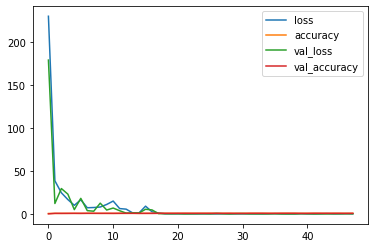

In [128]:
pd.DataFrame(history.history).plot();

In [129]:
# test the model

prediction = model.predict(x_test)
pd.Series(prediction[0], index=["Not A Ship", "Ship"])

Not A Ship    0.132775
Ship          0.867225
dtype: float32

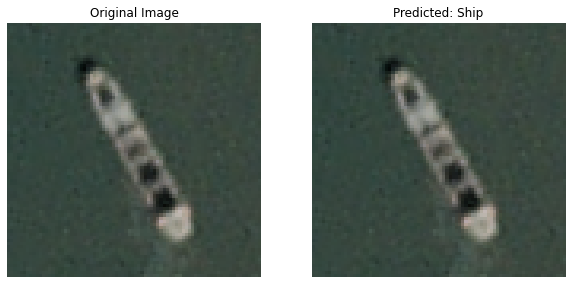

In [132]:
# Plotting the original & Predicted first image in x_test set
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(x_test[0])
plt.axis("off")
plt.title("Original Image")

# Predicting the label for the same
prediction = model.predict(np.expand_dims(x_test[0], axis=0))
predicted_class = "Ship" if np.argmax(prediction) == 1 else "Not A Ship"

plt.subplot(1, 2, 2)
plt.imshow(x_test[0])
plt.axis("off")
plt.title(f"Predicted: {predicted_class}")

plt.show()


In [131]:
predicted_data = pd.DataFrame(prediction, columns=["Not A Ship", "Ship"])
predicted_data.head(3)

,Not A Ship,Ship
0,0.132775,0.867225
1,0.950323,0.049677
2,0.028191,0.971808


In [113]:
#Transform y_test labels into a more readable DataFrame format.

y_test_data = pd.DataFrame(y_test, columns=["Not A Ship", "Ship"])
y_test_data.head(3)

,Not A Ship,Ship
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0


In [134]:
## Add the true 'Ship' class labels from 'y_test' to the 'predicted_data' DataFrame

predicted_data['There is a Ship'] = y_test[:, 1]

predicted_data.head()

,Not A Ship,Ship,There is a Ship
0,0.132775,0.867225,1.0
1,0.950323,0.049677,0.0
2,0.028191,0.971808,1.0
3,0.049512,0.950488,0.0
4,0.950323,0.049677,0.0


# Explore and check the misclassification

In [ ]:
# Calculate the difference between predicted 'Ship' class probabilities and true labels, then add to 'predicted_data' DataFrame

predicted_data["Difference"] = predicted_data["Ship"] - predicted_data["There is a Ship"]
predicted_data

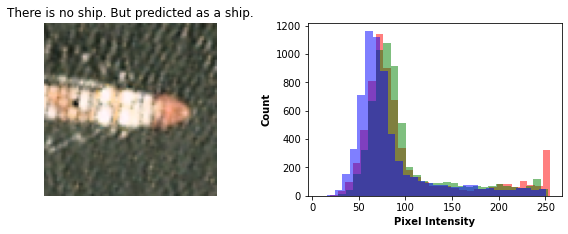

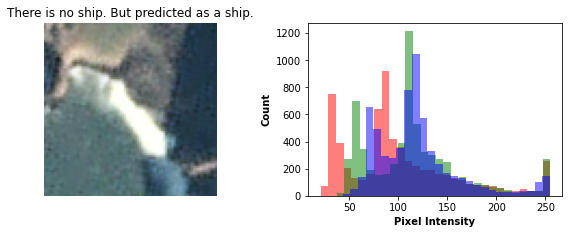

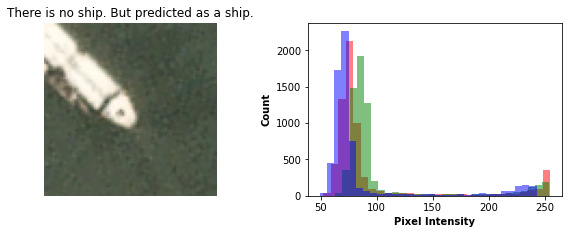

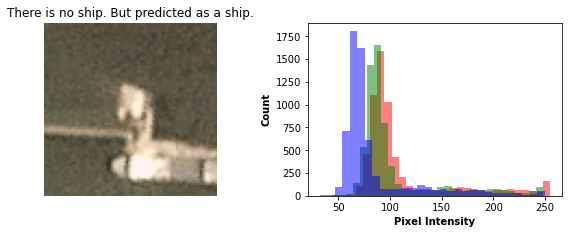

In [138]:
# Sort and plot where the model's predictions significantly differ from the actual labels (Ship class)

indexes = predicted_data.sort_values('Difference', ascending = False).head(4).index.to_list()

def plotHistogram(image_index):

    plt.figure(figsize = (10,7))
    plt.subplot(2,2,1)
    plt.imshow(x_test[image_index])
    plt.axis('off')
    plt.title('There is no ship. But predicted as a ship.')
    histo = plt.subplot(2,2,2)
    histo.set_ylabel('Count', fontweight = "bold")
    histo.set_xlabel('Pixel Intensity', fontweight = "bold")
    n_bins = 30
    plt.hist(x_test[image_index][:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
    plt.hist(x_test[image_index][:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
    plt.hist(x_test[image_index][:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
    plt.show()


for i in indexes:
    plotHistogram(i)

In [137]:
predicted_data.sort_values('Difference', ascending=True).head(10)

,Not A Ship,Ship,There is a Ship,Difference
537,0.950323,0.049677,1.0,-0.950323
365,0.950323,0.049677,1.0,-0.950323
750,0.950323,0.049677,1.0,-0.950323
331,0.950323,0.049677,1.0,-0.950323
743,0.950323,0.049677,1.0,-0.950323
518,0.950323,0.049677,1.0,-0.950323
322,0.950323,0.049677,1.0,-0.950323
85,0.950323,0.049677,1.0,-0.950323
730,0.950323,0.049677,1.0,-0.950323
100,0.950323,0.049677,1.0,-0.950323


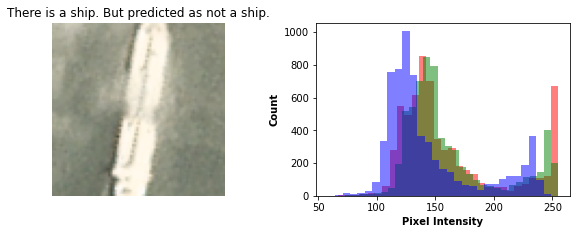

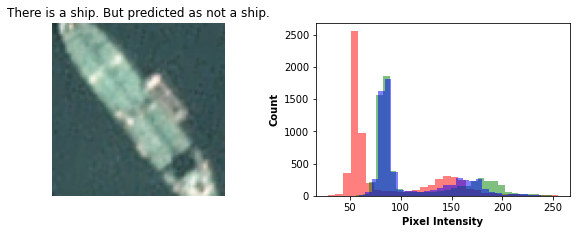

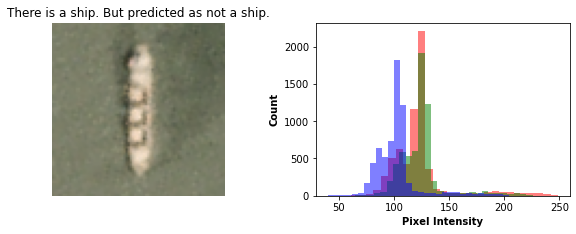

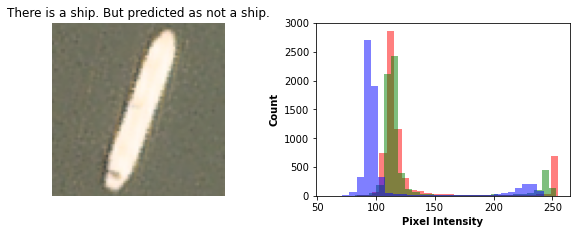

In [139]:
# Sort and plot where the model's predictions significantly differ from the actual labels ( Not Ship class)

indexes = predicted_data.sort_values('Difference', ascending = True).head(4).index.to_list()

def plotHistogram(image_index):

    plt.figure(figsize = (10,7))
    plt.subplot(2,2,1)
    plt.imshow(x_test[image_index])
    plt.axis('off')
    plt.title('There is a ship. But predicted as not a ship.')
    histo = plt.subplot(2,2,2)
    histo.set_ylabel('Count', fontweight = "bold")
    histo.set_xlabel('Pixel Intensity', fontweight = "bold")
    n_bins = 30
    plt.hist(x_test[image_index][:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
    plt.hist(x_test[image_index][:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
    plt.hist(x_test[image_index][:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
    plt.show()


#Implementation of the function

for i in indexes:
    plotHistogram(i)

# **CNN Model **

In [141]:
from keras import callbacks
model = Sequential()
#
model.add(Conv2D(filters = 64, kernel_size = (4,4),padding = 'Same', 
                 activation ='relu', input_shape = (80,80,3)))
model.add(MaxPool2D(pool_size=(5,5)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=(1,1)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=(1,1)))
model.add(Dropout(0.25))

# Fully connected
model.add(Flatten())
model.add(Dense(200, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(100, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(100, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(50, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 10, 
                                        restore_best_weights = True)
history = model.fit(x_train, y_train, epochs = 100, validation_data=(x_val, y_val), callbacks = [earlystopping])

Epoch 1/100
75/75 [==============================] - 7s 85ms/step - loss: 12.0615 - accuracy: 0.6383 - val_loss: 0.6619 - val_accuracy: 0.7513
Epoch 2/100
75/75 [==============================] - 6s 82ms/step - loss: 0.6007 - accuracy: 0.7267 - val_loss: 0.5937 - val_accuracy: 0.7513
Epoch 3/100
75/75 [==============================] - 6s 81ms/step - loss: 0.5784 - accuracy: 0.7450 - val_loss: 0.5742 - val_accuracy: 0.7513
Epoch 4/100
75/75 [==============================] - 7s 92ms/step - loss: 0.5822 - accuracy: 0.7483 - val_loss: 0.5709 - val_accuracy: 0.7513
Epoch 5/100
75/75 [==============================] - 6s 81ms/step - loss: 0.5834 - accuracy: 0.7508 - val_loss: 0.5692 - val_accuracy: 0.7513
Epoch 6/100
75/75 [==============================] - 6s 80ms/step - loss: 0.5584 - accuracy: 0.7487 - val_loss: 0.5694 - val_accuracy: 0.7513
Epoch 7/100
75/75 [==============================] - 6s 81ms/step - loss: 0.5579 - accuracy: 0.7525 - val_loss: 0.5694 - val_accuracy: 0.7513
Epoch

In [144]:
# Eevaluate CNN Model = Accuracy 94 %
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

25/25 [==============================] - 1s 20ms/step - loss: 0.2167 - accuracy: 0.9413
Test Loss: 0.2167
Test Accuracy: 94.13%


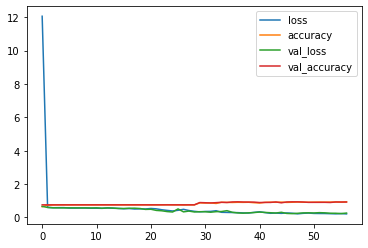

In [143]:
pd.DataFrame(history.history).plot();

# **Data Augmentation**

In [146]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False,
        rotation_range=5,  
        zoom_range = 0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(x_train)

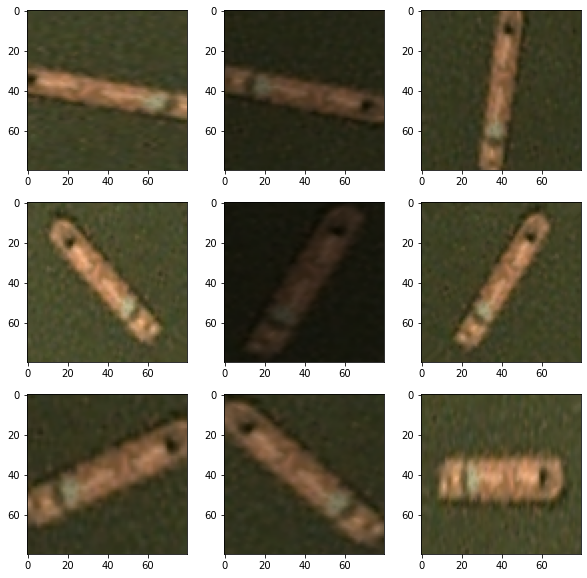

In [147]:
data = x_reshaped[y==1][15]
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datag = ImageDataGenerator(brightness_range=[0.2,1.0],
                          zoom_range=[0.5,1.0],
                          horizontal_flip=True,
                          rotation_range=90)
# prepare iterator
it = datag.flow(samples, batch_size=1)
# generate samples and plot
plt.figure(figsize = (10,10))
for i in range(9):
    # define subplot
    plt.subplot(3,3,i+1)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    # show the figure
plt.show()

In [148]:
history = model.fit(datagen.flow(x_train, y_train), epochs = 100, 
                    validation_data=(x_val, y_val), callbacks = [earlystopping])

Epoch 1/100
75/75 [==============================] - 10s 121ms/step - loss: 0.3545 - accuracy: 0.8621 - val_loss: 0.3389 - val_accuracy: 0.8388
Epoch 2/100
75/75 [==============================] - 9s 120ms/step - loss: 0.2957 - accuracy: 0.8783 - val_loss: 0.2985 - val_accuracy: 0.8750
Epoch 3/100
75/75 [==============================] - 9s 118ms/step - loss: 0.3082 - accuracy: 0.8729 - val_loss: 0.3233 - val_accuracy: 0.8575
Epoch 4/100
75/75 [==============================] - 10s 130ms/step - loss: 0.2956 - accuracy: 0.8729 - val_loss: 0.3490 - val_accuracy: 0.8400
Epoch 5/100
75/75 [==============================] - 9s 119ms/step - loss: 0.2867 - accuracy: 0.8888 - val_loss: 0.2734 - val_accuracy: 0.8863
Epoch 6/100
75/75 [==============================] - 9s 119ms/step - loss: 0.3209 - accuracy: 0.8608 - val_loss: 0.2501 - val_accuracy: 0.9112
Epoch 7/100
75/75 [==============================] - 10s 129ms/step - loss: 0.3158 - accuracy: 0.8804 - val_loss: 0.2854 - val_accuracy: 0.8

In [149]:
model.evaluate(x_test, y_test)

25/25 [==============================] - 1s 20ms/step - loss: 0.2214 - accuracy: 0.9300


[0.22135330736637115, 0.9300000071525574]


Test Accuracy Score :  0.93 



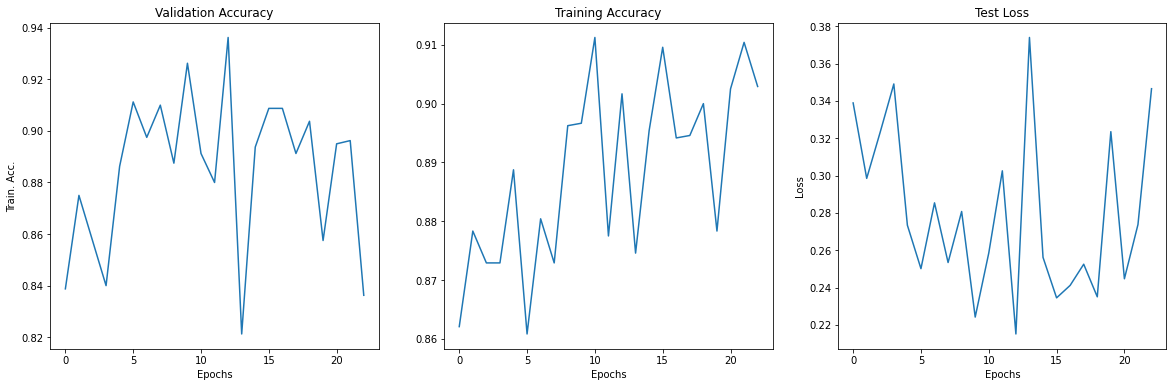

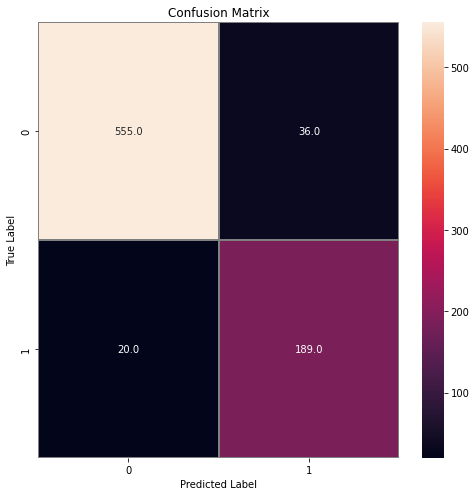

In [150]:
from sklearn import metrics
import seaborn as sns
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# Compute the confusion matrix

print("\n""Test Accuracy Score : ",metrics.accuracy_score(Y_true, Y_pred_classes),"\n")

fig, axis = plt.subplots(1, 3, figsize=(20,6))
axis[0].plot(history.history['val_accuracy'], label='val_acc')
axis[0].set_title("Validation Accuracy")
axis[0].set_xlabel("Epochs")
axis[0].set_ylabel("Val. Acc.")
axis[1].plot(history.history['accuracy'], label='acc')
axis[1].set_title("Training Accuracy")
axis[1].set_xlabel("Epochs")
axis[0].set_ylabel("Train. Acc.")
axis[2].plot(history.history['val_loss'], label='val_loss')
axis[2].set_title("Test Loss")
axis[2].set_xlabel("Epochs")
axis[2].set_ylabel("Loss")

plt.show()

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Plot the confusion matrix
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()

plt.show()